# Técnicas de Monte Carlo

El nombre "Monte Carlo" se aplica a métodos aleatorios (o pseudoaleatorios) de resolución problemas en una computadora. Dicho nombre esdebido a una pequeña ciudad de la riviera francesa famosa por sus casinos. 

En términos más exactos, un Monte Carlo es un proceso estocástico numérico, es decir, una secuencia de estados cuya evolucion viene determinada por sucesos aleatorios. Recor demos que un suceso aleatorio es un conjunto de resultados que se producen con cierta
probabilidad. Veamos un par de ejemplos ilustrativos.

Un ejemplo clásico de estas técnicas es el de la estimación del área de una forma irregular. Digamos que tienes una forma extraña y se quiere encontrar su área. Una técnica de Monte Carlo para encontrar esta área sería rodear la forma con una forma de área conocida (un rectángulo por ejemplo) y luego genere una gran cantidad de puntos aleatorios dentro del área conocida. El área de la forma es (aproximadamente) la fracción de los puntos que caen dentro la forma, multiplicada por el área conocida que rodea la forma. (Ver Figura)

<img src="Montecarlo1.png" width="800" height="487">

Para que este método funcione, es necesario que nuestros números aleatorios coincidan tres criterios: 
1. Deben estar distribuidos uniformemente. 
2. No estar correlacionados. 
3. La cantidad de puntos debe de ser alta.

# Números Aleatorios

Generar números aleatorios es intrínsecamente difícil. Por lo general, renunciamos a los números verdaderamente aleatorios y usamos "pseudoaleatorio" en su lugar, secuencias de números. Si la secuencia de números cumple los criterios anteriormente mencionados, harán el trabajo incluso si no son técnicamente aleatorios

Un ejemplo de un generador de números pseudoaleatorios, es el __generador lineal congruente__:
$$x_{n+1}=(ax_n+b)\mod c$$

Este generador de números pseudoaleatorios toma una "semilla" $x_0$ y genera una serie de números que, dependiendo de las opciones de $a$, $b$ y $c$, pueden cumplir los criterios necesarios para las técnicas de Monte Carlo.

__Ejemplo:__ Tomamos a = 65539, b = 0 y c = 231. Con una "semilla" inicial $x_0 = 1$, 

In [1]:
#Defino el generador
def Px(x0,a,b,c):
    """generador lineal congruente"""
    return (a*x0+b)%c

#Paso la semilla
x_0 = 1
for i in range(0,15):
    x_0 = Px(x_0,65539,0,231)
    print(x_0, end=", ")

166, 67, 34, 100, 199, 1, 166, 67, 34, 100, 199, 1, 166, 67, 34, 

este genera la secuencia 166, 67, 34, 100, 199, 1. En este punto, el la secuencia se repite. 

Este conjunto de parámetros se utilizó mucho en los años 70 y principios de los 80 es llamado "Randu". Estos parámetros tienen la ventaja de ser fácil de calcular para la computadora, por lo que fue posible generar grandes secuencias rápidamente. Sin embargo, hay un problema que no fue descubierto hasta mucho después: ¡la secuencia Randu está altamente correlacionada! 

Python viene con un generador de números pseudoaleatorios llamado "Merseinne Twister ”. Este es un generador muy rápido, y ha sido ampliamente probado por la comunidad matemática.

En lugar de utilizar nuestro propio generador de números pseudoaleatorios y correr el riesgo de caer en algún problema, usaremos el de python. Para acceder a estas rutinas de números aleatorios, se importa el paquete `random`

__Sintaxis:__
        #Paquete random
        import random

        # Genera un número psudoaleatorio entre 0 y 1
        random.random()
        # Genera un número psudoaleatorio entre a y b
        random.uniform (a,b)
        # Un elemento aleatorio de la lista
        random.choice(lista)
        # elemento aleatorio que sigue la distribucion de gauss
        random.gauss(mu,sigma)
        # Un número entero aleatorio en el rango a,b
        random.randint(a,b)

__Ejemplo:__ Generemos 15 números aleatorios entre 1 y 10


In [2]:
 #Paquete random
import random

for i in range(0,15):
    print(random.uniform(1,10), end=", ")


1.9126292000597447, 1.495659415331657, 5.120433773766138, 8.90916862798306, 6.997835553161353, 8.637732838924135, 4.841473149027166, 5.47524913105862, 5.907798310510031, 1.7987559441219925, 3.9481289417065693, 5.197860358010466, 4.308818031937385, 2.700474981821907, 7.0508360626984246, 

# Integración

Volvamos ahora al primer ejemplo. uno se puede preguntar "¿Por qué hacer esto? " pues si para que el programa determine si un punto aleatorio está dentro o fuera de la forma, el programa deberá tener una ecuación para la forma. Si el programa tiene una ecuación para la forma, ¿No debería ser posible encontrar el área integrando numéricamente, usando las técnicas numérica? Y esto en pricipio debería ser más rápido, que seleccionar al azar varios millones de puntos?

Todos esos problemas son verdad, para problemas de baja dimensionalidad. Sin embargo, en dimensiones superiores, la integración numérica directa se vuelve más difícil puesto que el número de cálculos de funciones para la integración numérica crece exponencialmente con la dimensión. 

También es cierto que las integraciones de Monte Carlo (MC) también aumentanen su dificultad con la dimensión, pero el aumento es lineal. Esto significa, que si para una intergral en una dimensión debo de hacer $10$ veces algunos procedimientos, para una integral de dimensión de orden 10 tendré que llamar estas mismas funciones $10^10$ veces. Si esa misma integral se hace usando MC, puede que en una dimensión tome $1 \times 10^6$ de llamadas pero para una de orden 10 será $10 \times 10^6$

__Ejemplo:__ Utilice la integración de Monte Carlo para encontrar el volumen de una esfera de radio 1 (sabeos que es $\frac{2}{3}\pi r^3$).

Podemos usar la simetría del problema para encontrar el volumen de un cuarto de la esfera, luego multiplique por 4 para obtener nuestra respuesta final. Para el volumen conocido rodeando nuestra pieza desconocida, usemos el cubo unitario: $x$, $y$, y $z$ rango de 0 a 1. Este rango de valores corresponde exactamente al
números aleatorios distribuidos uniformemente dados por `random.random()`.


In [3]:
from random import random
from math import sqrt, pi

#Numero de puntos totales
N=100000
#Contador de puntos en la esfera
in_points=0
for i in range(N):
    #Creo una tupla con los valores x,y,z del punto en el espacio
    point = (random(),random(),random())
    #Calculo el radio
    r = point[0]*point[0]+point[1]*point[1]+point[2]*point[2]
    #Si el punto esta dentro del cuarto de esfera cuento
    if r<1: in_points+=1

#Calculo el volumen
volumen = 4*in_points/N

print(f"Volumen MC de la esfera:      {volumen:4f} +- {4*sqrt(volumen)/sqrt(N):4f}")
print(f"Volumen Teorico de la esfera: {(2/3)*pi:4f}")

Volumen MC de la esfera:      2.092600 +- 0.018298
Volumen Teorico de la esfera: 2.094395


__Ejercicios:__ 

- Calcule $\int_{0}^{\pi}\sin(x)dx$ usando MC. Informe su incertidumbre en el resultado y comparar con el resultado conocido.
- El "volumen" de una esfera en dos dimensiones (también conocido como un "círculo") es $\pi r^2$. El volumen de una esfera de tres dimensiones ($x^2 + y^2 + z^2 = r^2$) es $4\pi r^3$. La ecuacion para una 4-esfera es $x^2 + y^2 + z^2 + w^2 = r^2$. Podemos adivinar, por extrapolación de los casos bidimensionales y tridimensionales, que el "volumen" de una 4-esfera es $\alpha \pi r^4$. Utilice la integración de Monte Carlo para estimar $\alpha$.

# Métodos Estocásticos

Si a un vaso con agua se le agrega una gota de tinte en el centro, luego de determinado tiempo el tinta se esparce y eventualmente se distribuye uniformemente a lo largo el agua. ¿Cómo modelaríamos este comportamiento computacionalmente?

El método directo sería calcular la posición y la velocidad(momento) para cada molécula en vaso, pero esto plantea algunas dificultades de cálculo. Suponiendo $10^23$
moléculas, con seis grados de libertad cada una, y si se usa un número de punto flotante de 4 bytes por cada grado de libertad, este método requeriría $2,4 \times 10^12$ Tb solo para almacenar el estado del sistema en cualquier instante. 

Otro problema es que el método directo tiene una utilidad limitada, incluso si podría implementarse: Podríamos calcular el tiempo que tomaría las moléculas de tinta para distribuir uniformemente por el agua, pero luego, si se quiere saber algo de un sistema parecido con un parámetro diferente (i.e. volumen) se tendría que repetir el cálculo. 

En lugar del método directo, utilizamos métodos estocásticos. Los fundamentos detrás de estos métodos es que los conjuntos grandes actúan en "promedio" de cierta manera, incluso si los elementos individuales son aleatorios. Perdemos los detalles de cada una de las moléculas, y solo se tiene en cuenta el comportamiento del conjunto.

## El problema del Borracho

El método más simple, el _paseo aleatorio en una dimensión_. Comience con un individuo borracho parado en la acera fuera del bar. Este individuo puede dar un paso adelante o atrás. Para simplificar el modelo, asumiremos que la probabilidad de la dirección es $0,5$ y las longitudes de los pasos son todas iguales. Luego, ¿qué tan rápido, en promedio, esta caminata aleatoria mueve el individuo lejos del bar?


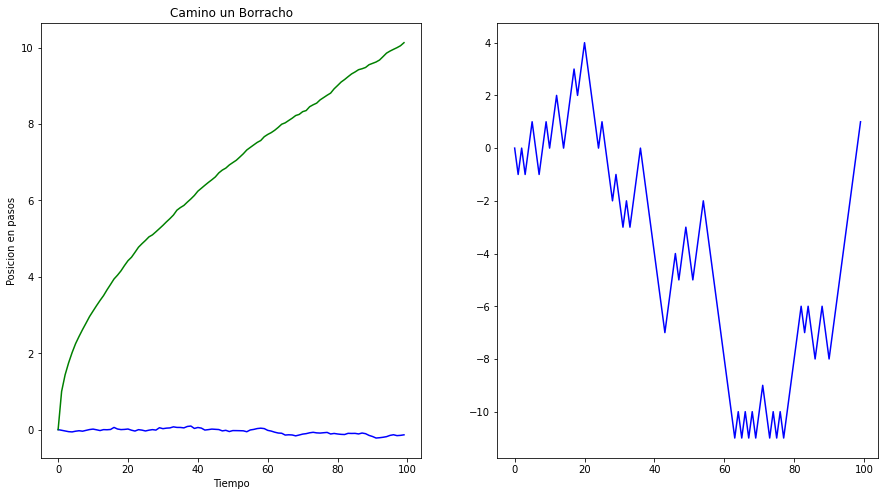

In [4]:
from math import sqrt
from random import choice
import numpy as np
import matplotlib.pyplot as plt

#Numero de pasos
Pasos=100
##de borachos
Borrachos = 2000


#Uso vectores para guardar el estado del sistema
x = np.zeros([Pasos])
t = range(Pasos)
x_sum = np.zeros([Pasos])
x2_sum = np.zeros([Pasos])

#For sobre los borrachos
for j in range(Borrachos):
    #For sobre los pasos
    for i in range(1,Pasos):
        #Que tipo de paso da 
        if choice([0,1]):
            #Paso atras
            x[i] = x[i-1]-1
        else:
            #Paso adelante
            x[i] = x[i-1]+1

    #Sumar x, y x2
    for i in range(Pasos):
        x_sum[i] = x_sum[i]+ x[i]
        x2_sum[i] = x2_sum[i] + x[i]*x[i]

#Calculemos la media cuadratica de las posiciones
x_avg = [ i/Borrachos for i in x_sum ]
RMS = [ sqrt(i/Borrachos) for i in x2_sum]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 8))


# los valores de x e y
ax1.plot( t , x_avg , 'b' )
ax1.plot( t ,RMS,  'g' )

ax1.set(title = "Promedio de Borrachos",
       xlabel = "Tiempo",
       ylabel = "Posicion promedio \n RMS")

#Ejemplo de un borracho
ax2.plot( t , x , 'b' )
ax1.set(title = "Camino un Borracho",
       xlabel = "Tiempo",
       ylabel = "Posicion en pasos")

plt.show()

Se Puede mostrar que el RMS va como $\sqrt{t}$

__Ejercicio:__

¿Qué sucede en la caminata aleatoria unidimensional si el tamaño del paso es también al azar? Modele esta situación donde en lugar de aleatorizar el
dirección de cada paso, elige un paso con una longitud aleatoria en el rango [-1, 1]. ¿Cuál es la dependencia del tiempo del desplazamiento RMS en este caso?
